In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
advertising_data = pd.read_csv('data/advertising.csv', index_col=[0])

In [3]:
display(advertising_data.head(3))

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [4]:
ad_types = advertising_data.columns[0:3] # wide to long
advertising_data_long = pd.melt(
    advertising_data,
    value_vars=ad_types, 
    var_name='advertising_type',
    value_name='amount_spent',
    id_vars='sales'
)

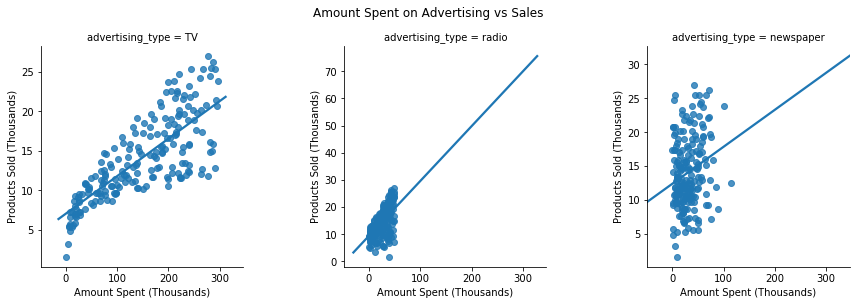

In [5]:
sales_grid = sns.FacetGrid(
    advertising_data_long, 
    col='advertising_type', 
    # sharex=False,
    sharey=False,
    height=4
)
sales_grid = sales_grid.map(sns.regplot, 'amount_spent', 'sales', ci=False)
sales_grid.set(xlabel='Amount Spent (Thousands)', ylabel='Products Sold (Thousands)')

plt.suptitle('Amount Spent on Advertising vs Sales', y=1.05)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [6]:
# simple regression
X_single = {ad_type: advertising_data.loc[:, ad_type].to_numpy() for ad_type in ad_types}
y = advertising_data.loc[:, 'sales'].to_numpy()

pearsonr_results = {ad_type: pearsonr(X_single[ad_type], y) for ad_type in X_single}

for ad_type in pearsonr_results:
    results = pearsonr_results[ad_type]
    correlation_coeff, p_value = results[0], results[1]
    print('Type of Advertisement:', ad_type)
    print('Correlation Coefficient:', correlation_coeff)
    print('p-value: {}\n'.format(p_value))

Type of Advertisement: TV
Correlation Coefficient: 0.7822244248616067
p-value: 1.4673897001945725e-42

Type of Advertisement: radio
Correlation Coefficient: 0.5762225745710552
p-value: 4.354966001767037e-19

Type of Advertisement: newspaper
Correlation Coefficient: 0.22829902637616545
p-value: 0.001148195868888248



In [7]:
display(advertising_data.corr())

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
X= advertising_data.iloc[:, :-1].to_numpy()

regressor = LinearRegression()
regressor.fit(X, y)
regressor.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [10]:
X = sm.add_constant(X) # add constant 

model = sm.OLS(endog=y, exog=X)
results = model.fit()

results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,2.9389,0.312,9.422,0.000,2.324,3.554
x1,0.0458,0.001,32.809,0.000,0.043,0.049
x2,0.1885,0.009,21.893,0.000,0.172,0.206
x3,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [ ]:
# test for association
# relationship strength
# which predictors

# accuracy - effect of each medium and prediction of future sales
# synergy between advertising